In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv(r'C:\Users\uday_kiran\Downloads\adas_data.csv')
df.head()

,distance,relative_speed,lane_deviation,steering_angle,acceleration,brake_pressure,weather_condition,road_type,alert_level
0,40.581311,-18.892024,0.785117,15.543269,0.431975,39.363552,0,0,0
1,95.317859,2.514057,0.740936,26.701326,1.832594,47.343566,0,1,0
2,74.539424,22.376750,2.718764,-22.457889,1.560966,85.454739,2,0,0
3,61.872556,13.933493,0.748639,11.238669,-2.076601,34.000439,0,2,0
4,19.821771,18.393669,0.815849,6.457138,-2.104503,86.964968,0,2,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           1000 non-null   float64
 1   relative_speed     1000 non-null   float64
 2   lane_deviation     1000 non-null   float64
 3   steering_angle     1000 non-null   float64
 4   acceleration       1000 non-null   float64
 5   brake_pressure     1000 non-null   float64
 6   weather_condition  1000 non-null   int64  
 7   road_type          1000 non-null   int64  
 8   alert_level        1000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 70.4 KB


In [21]:
df.describe()

,distance,relative_speed,lane_deviation,steering_angle,acceleration,brake_pressure,weather_condition,road_type,alert_level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.574373,0.421038,1.507217,-0.866246,-0.035368,49.846449,1.022000,0.956000,0.148000
std,27.753049,17.531394,0.872023,25.784041,1.720860,28.919481,0.812512,0.810383,0.458592
min,5.440042,-29.806904,0.000035,-44.941195,-2.999816,0.618382,0.000000,0.000000,0.000000
25%,27.417460,-15.535544,0.784053,-23.228931,-1.530156,24.938000,0.000000,0.000000,0.000000
50%,52.196701,1.124034,1.501842,-1.414864,-0.032411,49.040282,1.000000,1.000000,0.000000
75%,75.710361,15.627903,2.277311,21.378673,1.439961,73.985178,2.000000,2.000000,0.000000
max,99.973179,29.964824,2.993463,44.960193,2.986496,99.935030,2.000000,2.000000,2.000000


In [17]:
df.shape

(1000, 9)

In [5]:
# Separate features and target
X = df.drop('alert_level', axis=1)
y = df['alert_level']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 8)
(200, 8)
(800,)
(200,)


In [7]:
# Fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [8]:
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [11]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [12]:
# Evaluate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.885

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       179
           1       0.25      0.08      0.12        13
           2       0.50      0.12      0.20         8

    accuracy                           0.89       200
   macro avg       0.55      0.39      0.42       200
weighted avg       0.84      0.89      0.86       200



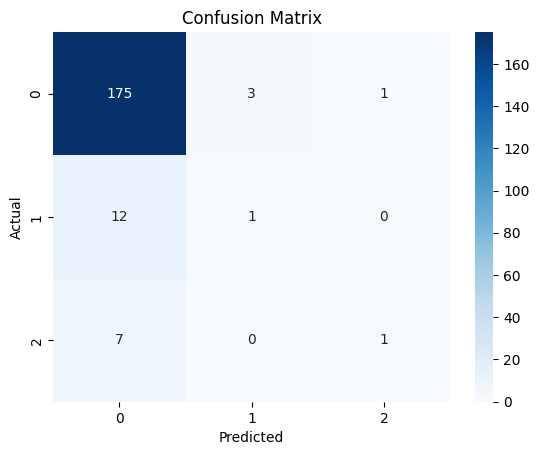

In [13]:
# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Elbow Method for Optimal K
error_rates = []
for k in range(1, 21):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_scaled, y_train)
    pred_k = knn_k.predict(X_test_scaled)
    error_rates.append(np.mean(pred_k != y_test))

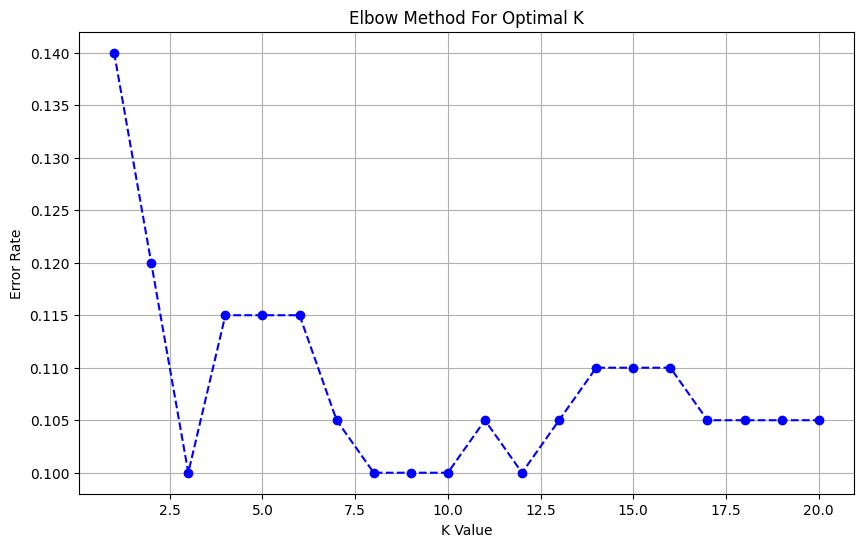

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method For Optimal K')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()
